# ML Zoomcamp 3.1 - Churn Prediction Project
- This lesson focuses on creating a classification model to predict customer churn.

# ML Zoomcamp 3.2 - Data Preparation

In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [482]:
# Load the dataset
df = pd.read_csv("telco-customer-churn.csv")

In [483]:
# Clean column names and categorical data
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [484]:
# Display the first few rows of the dataframe
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [485]:
# Check data types of the dataframe
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [486]:
# Replace missing data in 'totalcharges' with 0
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [487]:
# Convert 'churn' column to binary (0, 1)
df.churn = (df.churn == 'yes').astype(int)

# ML Zoomcamp 3.3 - Setting Up The Validation Framework with Scikit-learn

In [488]:
from sklearn.model_selection import train_test_split

In [489]:
# Split the data into training and test sets

# The dataset 'df' is split into two parts: 'df_full_train' and 'df_test'.
# 'df_test' will contain 20% of the data, and 'df_full_train' will contain the remaining 80%.
# The 'random_state' parameter ensures that the split is reproducible.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Further split 'df_full_train' into 'df_train' and 'df_val'.
# 'df_val' will contain 25% of 'df_full_train', which is equivalent to 20% of the original dataset.
# 'df_train' will contain the remaining 60% of the original dataset.
# Again, 'random_state' is used for reproducibility.
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [490]:
# Reset index for train, validation, and test sets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [491]:
# Separate target variable 'churn' from features
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


# ML Zoomcamp 3.4 - EDA

In [492]:
# Analyze churn rate
# Analyzing the churn rate provides a baseline for understanding customer attrition.
# It helps in evaluating the effectiveness of predictive models and strategies to reduce churn.
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [493]:
# Define numerical and categorical columns
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [494]:
# Calculate unique values in each categorical column
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# ML Zoomcamp 3.5 - Feature Importance: Churn Rate And Risk Ratio

- It provides insights into the likelihood of customers leaving, which is essential for business planning.
- Understanding the churn rate helps in evaluating the effectiveness of predictive models and strategies to reduce churn.

In [495]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [496]:
# 1. Difference (diff):
#    - A positive difference indicates that the category has a higher churn rate than the global average.
#    - A negative difference indicates that the category has a lower churn rate than the global average.
#    - Larger absolute values suggest a stronger deviation from the global churn rate.

# 2. Risk ratio (risk):
#    - A risk ratio > 1 indicates that the category has a higher risk of churn compared to the global average.
#    - A risk ratio < 1 indicates that the category has a lower risk of churn compared to the global average.
#    - The further the risk ratio is from 1, the stronger the effect:
#      - For example, a risk ratio of 2 means the category has twice the risk of churn compared to the global average.
#      - A risk ratio of 0.5 means the category has half the risk of churn compared to the global average.

In [497]:
# Calculate churn rate and risk ratio for categorical variables
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# ML Zoomcamp 3.6 - Feature Importance: Mutual Information

### Mutual information is important because:
1. It measures the dependency between variables and the target (churn).
2. It can capture non-linear relationships, unlike correlation.
3. It helps identify the most informative features for predicting churn.
4. It aids in feature selection, allowing us to focus on the most relevant variables.
5. It's particularly useful for categorical variables, where linear correlations may not be applicable.

In [498]:
from sklearn.metrics import mutual_info_score

In [499]:
# Calculate mutual information for categorical variables
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# ML Zoomcamp 3.7 - Feature Importance: Correlation

### Correlation helps identify linear relationships between numerical features and churn:
- Negative correlations (e.g., tenure) indicate that as the feature value increases, churn likelihood decreases.
- Positive correlations (e.g., monthlycharges) suggest that as the feature value increases, so does churn likelihood.
- The magnitude of correlation indicates the strength of the relationship.
- Features with higher absolute correlation values are generally more important for predicting churn.
- However, correlation doesn't capture non-linear relationships, so it should be used alongside other methods.

In [500]:
# Calculate correlation between numerical features and churn
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# ML Zoomcamp 3.8 - One-Hot Encoding

In [501]:
from sklearn.feature_extraction import DictVectorizer

In [502]:
# Convert training and validation data to dictionaries
# Using orient='records' is crucial here because:
# 1. It creates a list of dictionaries where each dictionary represents a row in the DataFrame.
# 2. Each dictionary has column names as keys and row values as values.
# 3. This format is compatible with DictVectorizer, which expects an iterable of dictionaries.
# 4. It preserves the relationship between features and their values for each sample.

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [503]:
# DictVectorizer works as follows:
# 1. It takes a list of dictionaries as input, where each dictionary represents a sample.
# 2. It automatically detects all unique keys (feature names) across all dictionaries.
# 3. For categorical features:
#    - It creates binary columns for each unique category (one-hot encoding).
#    - The column names are formatted as "feature_name=category".
# 4. For numerical features:
#    - It keeps them as-is, using the original feature name as the column name.
# 5. It transforms the input dictionaries into a numerical matrix:
#    - Each row represents a sample.
#    - Each column represents a feature or category.
# 6. The 'fit_transform' method learns the feature structure and applies the transformation.
# 7. The 'transform' method applies the learned transformation to new data.

# ML Zoomcamp 3.9 - Logistic Regression
### The sigmoid function is crucial for logistic regression because:
1. It maps any input value to a probability between 0 and 1.
2. It's used to convert the linear combination of features and weights into a probability.
3. Its S-shaped curve helps model the non-linear decision boundary in classification problems.
4. The output can be interpreted as the probability of the positive class in binary classification.

In [504]:
# Define sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ML Zoomcamp 3.10 - Training Logistic Regression with Scikit-Learn

In [505]:
from sklearn.linear_model import LogisticRegression

In [506]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [507]:
model.intercept_[0]

-0.10907720820055147

In [508]:
# Predict probabilities on validation set
y_pred = model.predict_proba(X_val)[:, 1]

# Explanation:
# 1. model.predict_proba(X_val) returns a 2D array of shape (n_samples, 2)
# 2. Each row contains probabilities for both classes: [P(class 0), P(class 1)]
# 3. [:, 1] selects the second column (index 1), which contains P(class 1)
# 4. This gives us the probability of the positive class (churn) for each sample
# 5. y_pred now contains these probabilities, which can be used for evaluation or thresholding

In [509]:
# Calculate accuracy of predictions
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

In [510]:
# 1. y_pred contains probabilities of churn for each customer in the validation set
# 2. churn_decision = (y_pred >= 0.5) creates a boolean array:
#    - True for probabilities >= 0.5 (predicted churn)
#    - False for probabilities < 0.5 (predicted no churn)
# 3. (y_val == churn_decision) compares our predictions to the actual values:
#    - True when prediction matches actual value
#    - False when prediction doesn't match actual value
# 4. .mean() calculates the proportion of correct predictions:
#    - It's equivalent to (number of correct predictions) / (total number of predictions)
# 5. The result is the accuracy of our model on the validation set

# ML Zoomcamp 3.11 - Model Interpretation

In [511]:
# This code creates a dictionary that maps feature names to their corresponding coefficients in the logistic regression model.
# Here's how it works:
# 1. dv.get_feature_names_out() returns an array of feature names created by the DictVectorizer
# 2. model.coef_[0] gives the coefficients of the logistic regression model
# 3. .round(3) rounds these coefficients to 3 decimal places for readability
# 4. zip() pairs each feature name with its corresponding coefficient
# 5. dict() converts these pairs into a dictionary
# The resulting dictionary shows how much each feature contributes to the prediction:
# - Positive values increase the likelihood of churn
# - Negative values decrease the likelihood of churn

# - The magnitude of the coefficient indicates the strength of its impact

In [512]:
# Interpret model coefficients
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [513]:
small = ['contract', 'tenure', 'monthlycharges']

dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

X_train_small = dv_small.transform(dicts_train_small)

model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [514]:
w0 = model_small.intercept_[0]
w = model_small.coef_[0]

w0, w.round(3)

(-2.4779575959440647, array([ 0.971, -0.024, -0.948,  0.027, -0.036]))

# ML Zoomcamp 3.12 - Using the Model

In [515]:
# Train model using all features
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [516]:
# Train logistic regression model on full training data
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [517]:
# Predict on test set
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred_test = model.predict_proba(X_test)[:, 1]

In [518]:
# Calculate test set accuracy
churn_decision_full = (y_pred_test >= 0.5)
(churn_decision_full == y_test).mean()

0.8140525195173882

In [519]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [520]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [521]:
X_small = dv.transform([customer])
model.predict_proba(X_small)[0, 1]

0.6588002343808528

# ML Zoomcamp 4.2 - Accuracy and Dummy Model

In [522]:
len(y_val)

1409

In [523]:
# Number of correct answers
(churn_decision == y_val).mean()

0.8034066713981547

In [524]:
1132 / 1409

0.8034066713981547

In [525]:
# We have used 0.5 as our score to base our predictions on
# When more than 0.5 means the customer is more likely to churn
# When less than 0.5 means the customer is more likely to stay
# But how do we determine if this is good?


In [526]:
from sklearn.metrics import accuracy_score

In [527]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [528]:
# Calculate the accuracy accross different thresholds
threshholds = np.linspace(0,1,21)
threshholds

scores = []

for t in threshholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


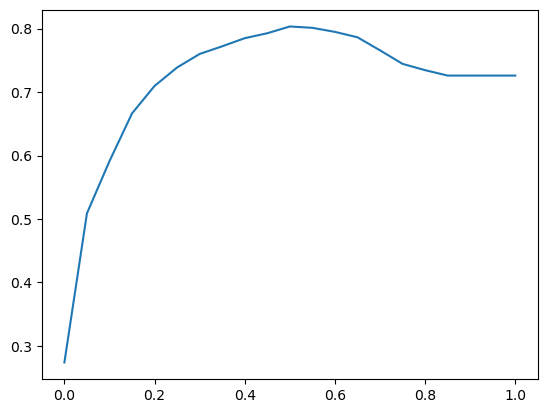

In [529]:
# Visualizing Accuracy vs Threshold
plt.plot(threshholds, scores)

In [530]:
from collections import Counter

In [531]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [532]:
# Dummy Model Concept:
# The code calculates the accuracy of always predicting the majority class (not churning).
# This is done by calculating 1 - y_val.mean(), which represents the proportion of non-churn cases.

In [533]:
1- y_val.mean()

0.7260468417317246

### The main takeaway seems to be that while accuracy is a useful metric, it's important to:
1. Consider different probability thresholds for making predictions.
2. Compare your model's performance against a simple baseline (dummy model).
3. Understand that high accuracy doesn't always mean a good model, especially with imbalanced datasets.

# ML Zoomcamp 4.3 - Confusion Table

- True Positive: g(xi) >= threshold & y = 1
- True Negative: g(xi) < threshold & y = 0
- False Positive: g(xi) >= threshold & y = 0
- False Negative: g(xi) < threshold & y = 1

In [534]:
t = 0.5

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [535]:
tp = (predict_positive  & actual_positive).sum()
tn = (predict_negative  & actual_negative).sum()
tp, tn

(210, 922)

In [536]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
fp, fn

(101, 176)

In [537]:
# We determine what correct and incorrect decisions our model make

In [538]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[922, 101],
       [176, 210]])

In [539]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

# ML Zoomcamp 4.4 - Precision and Recall

In [540]:
(tp + tn) / (tp + tn + fp + fn)

0.8034066713981547

# ML Zoomcamp 4.5 - ROC Curves

Receiver Operating Characteristics (ROC) - Way of describing the performance of a binary classification model

We are interested in FPR and TPR

In [541]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [542]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [543]:
scores = []

threshholds = np.linspace(0, 1, 101)

for t in threshholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive  & actual_positive).sum()
    tn = (predict_negative  & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))


In [544]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [545]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [546]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [547]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


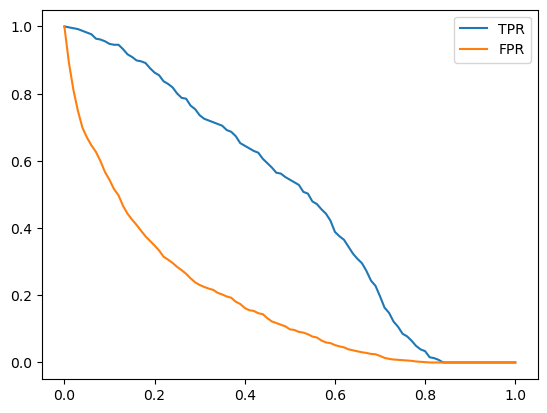

In [548]:
# note that we want to keep fpr go down faster and make tpr as close as to 1.0 score

plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'],  label='FPR')
plt.legend()

### Random Model

In [549]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [550]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [551]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    threshholds = np.linspace(0, 1, 101)

    for t in threshholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive  & actual_positive).sum()
        tn = (predict_negative  & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores


In [552]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [553]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


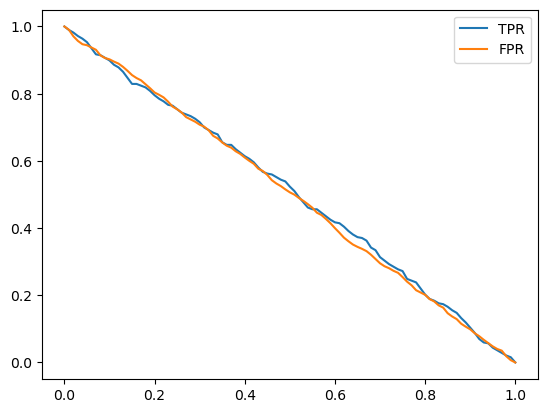

In [554]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'],  label='FPR')
plt.legend()

### Ideal Model

In [555]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [556]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [557]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [558]:
1 - y_val.mean()

0.7260468417317246

In [559]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [560]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [561]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


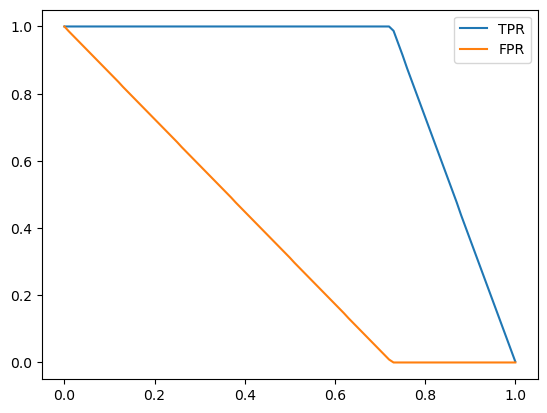

In [562]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'],  label='FPR')
plt.legend()

### Put everything together

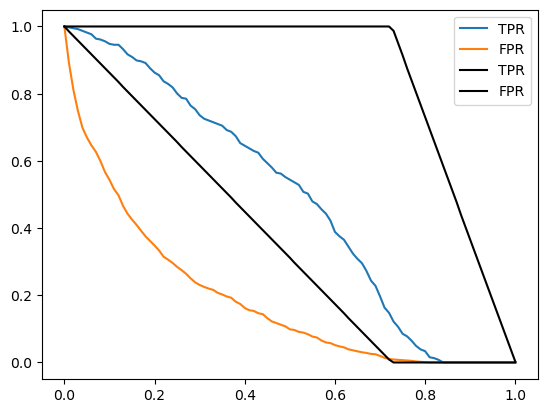

In [563]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'],  label='FPR')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
# plt.plot(df_rand.threshold, df_rand['fpr'],  label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'],  label='FPR', color='black')

plt.legend()

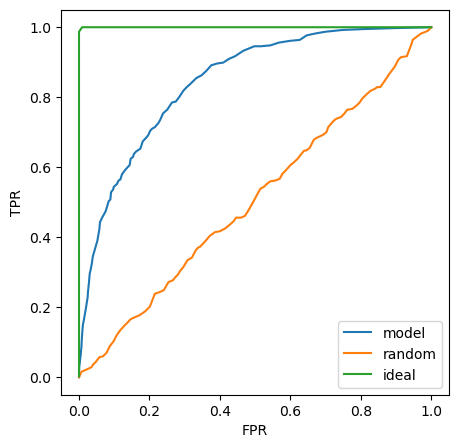

In [564]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [565]:
from sklearn.metrics import roc_curve

In [566]:
fpr, tpr, threshholds = roc_curve(y_val, y_pred)

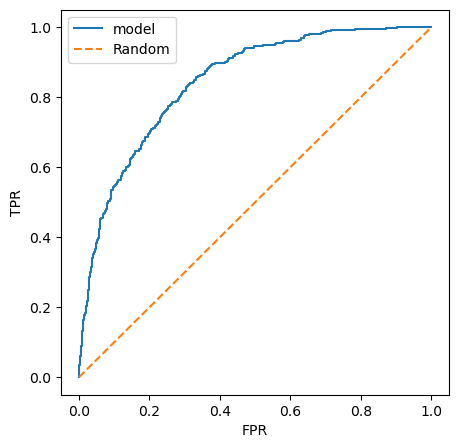

In [567]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='Random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# ML Zoomcamp 4.6 - ROC AUC
- Area under the curve
- Interpretation of AUC

In [568]:
from sklearn.metrics import auc

In [569]:
auc(fpr, tpr)

0.8438530381535563

In [570]:
auc(df_scores.fpr, df_scores.tpr)

0.8438125193097616

In [571]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [572]:
fpr, tpr, threshholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438530381535563

In [573]:
from sklearn.metrics import roc_auc_score

In [574]:
roc_auc_score(y_val, y_pred)

0.8438530381535563

In [575]:
# AUC = probability that randomly selected positive example has higher score than randomly selected negative example

In [576]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [577]:
import random

In [578]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success += 1

success / n

0.8439

In [579]:
pos[pos_ind] > neg[neg_ind]

True

In [580]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84648

# ML Zoomcamp 4.7 - Cross-Validation
- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

In [581]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [582]:
dv, model = train(df_train, y_train, C=0.001)

In [583]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [584]:
y_pred = predict(df_val, dv, model)

In [585]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [586]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:01<00:06,  1.05s/it]

C=0.001 0.825 +- 0.009


c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C=0.01 0.840 +- 0.008


c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C=0.1 0.842 +- 0.007


c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C=0.5 0.842 +- 0.007


c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C=1 0.842 +- 0.007


c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C=5 0.842 +- 0.007


c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C=10 0.842 +- 0.007


In [587]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

c:\Users\Spoofiyy\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8583869587355237

In [588]:
len(train_idx), len(val_idx)

(4508, 1126)

In [589]:
len(df_full_train)

5634